# Random Forest Classification Obesity Level

## Importing the libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from lime.lime_tabular import LimeTabularExplainer
import dice_ml

## Importing the dataset

In [2]:
try:
    df = pd.read_csv('backend/DataObesity_Test.csv')
except FileNotFoundError:
    print("File 'DataObesity_Test.csv' tidak ditemukan. Pastikan Anda sudah mengunduhnya dari Kaggle.")
    exit()

## Preprocessing Data

### Transformation Data

In [3]:
df['Height'] = df['Height'] * 100
df['Age'] = df['Age'].astype(int)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
print("--- TIPE DATA LAMA ---")
print(df.dtypes)
kolom_float = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'] 

for kolom in kolom_float:
    df[kolom] = df[kolom].astype('int64')

print("\n\n--- TIPE DATA BARU ---")
print(df.dtypes)



--- TIPE DATA LAMA ---
Gender                             object
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


--- TIPE DATA BARU ---
Gender                             object
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC          

In [5]:
X_transformed = df.drop('NObeyesdad', axis=1)
y =  df['NObeyesdad']

categorical_features = ['Gender','family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE','SCC', 'CALC','MTRANS']



### Visualitation Data


Memulai proses penampilan plot...
Tutup jendela plot yang muncul untuk melanjutkan ke plot berikutnya.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12164\3667667619.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis', order=df[feature].value_counts().index)


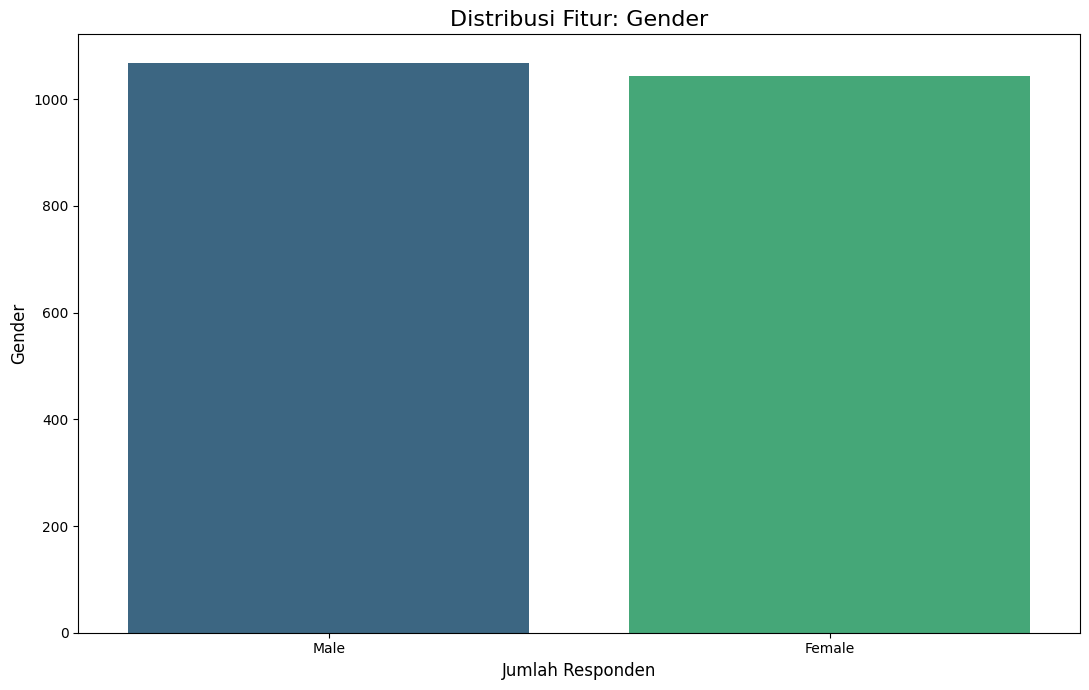

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12164\3667667619.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis', order=df[feature].value_counts().index)


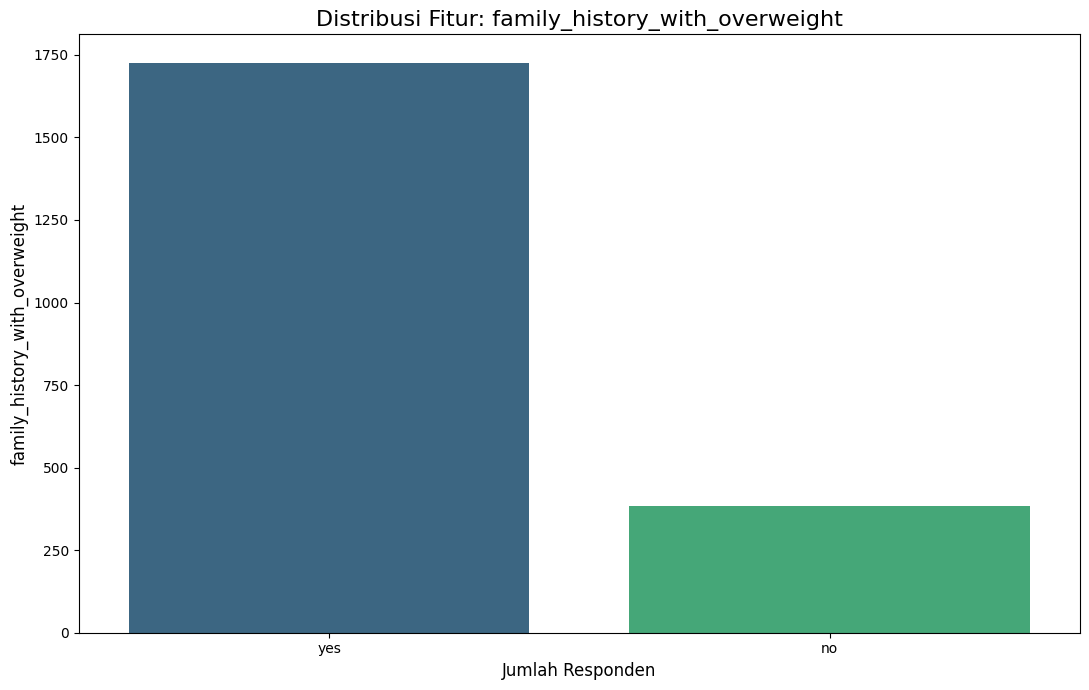

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12164\3667667619.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis', order=df[feature].value_counts().index)


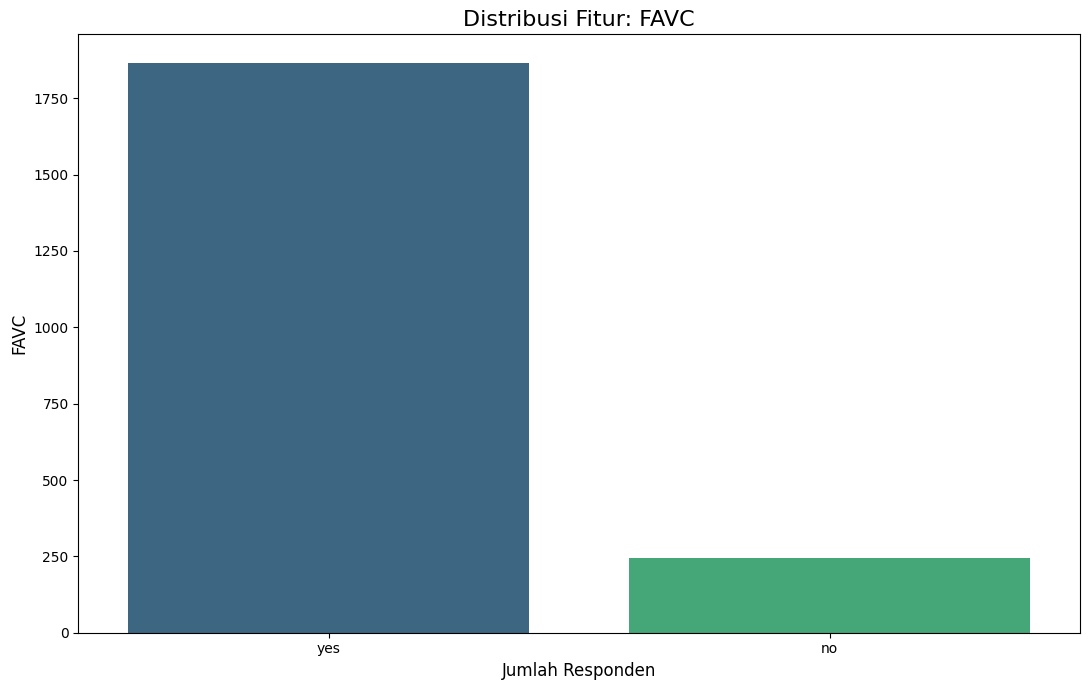

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12164\3667667619.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis', order=df[feature].value_counts().index)


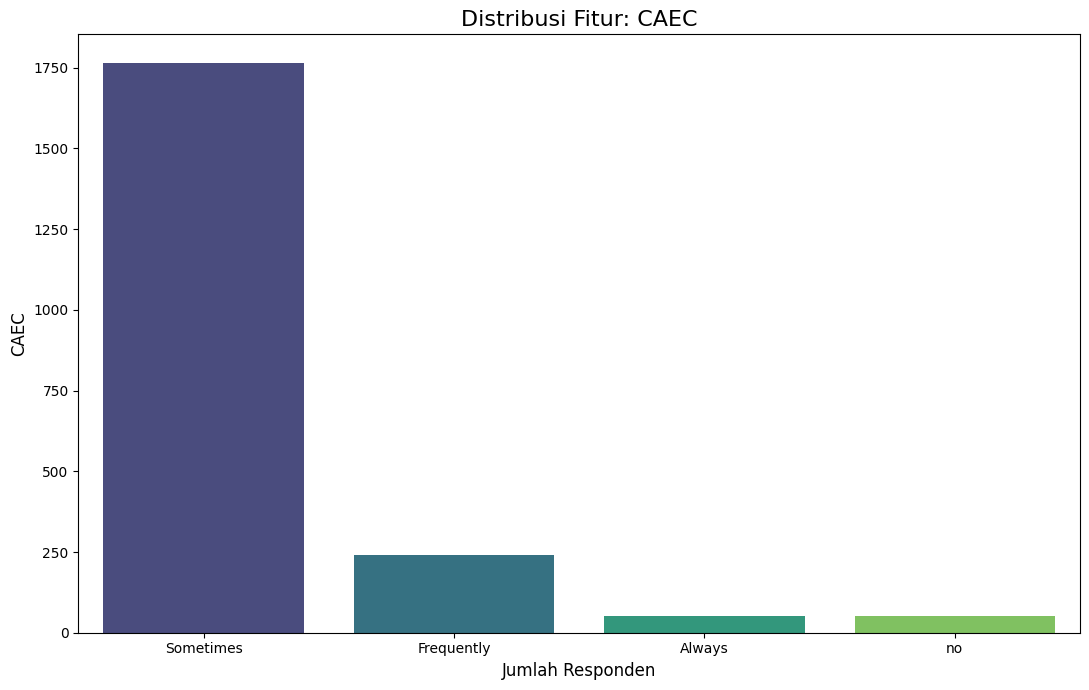

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12164\3667667619.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis', order=df[feature].value_counts().index)


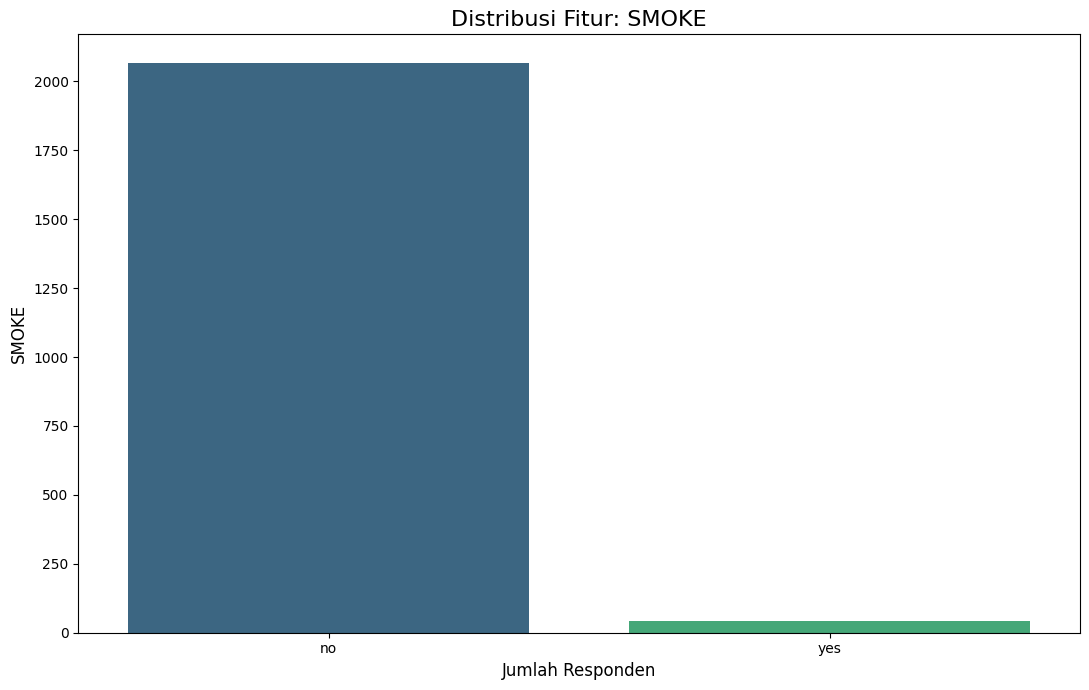

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12164\3667667619.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis', order=df[feature].value_counts().index)


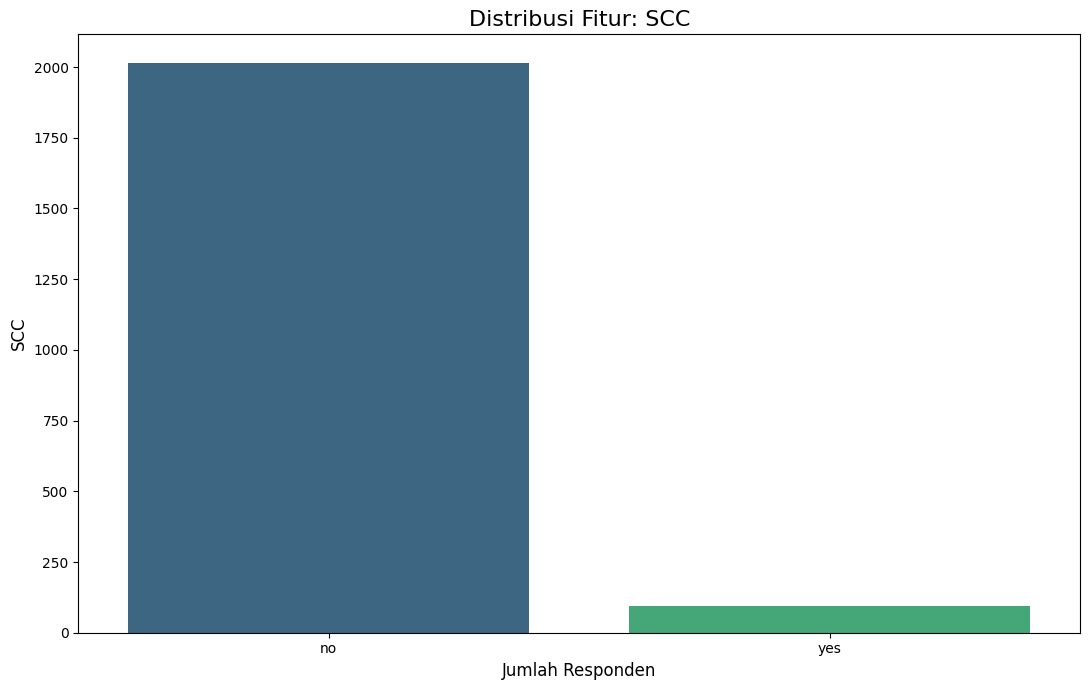

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12164\3667667619.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis', order=df[feature].value_counts().index)


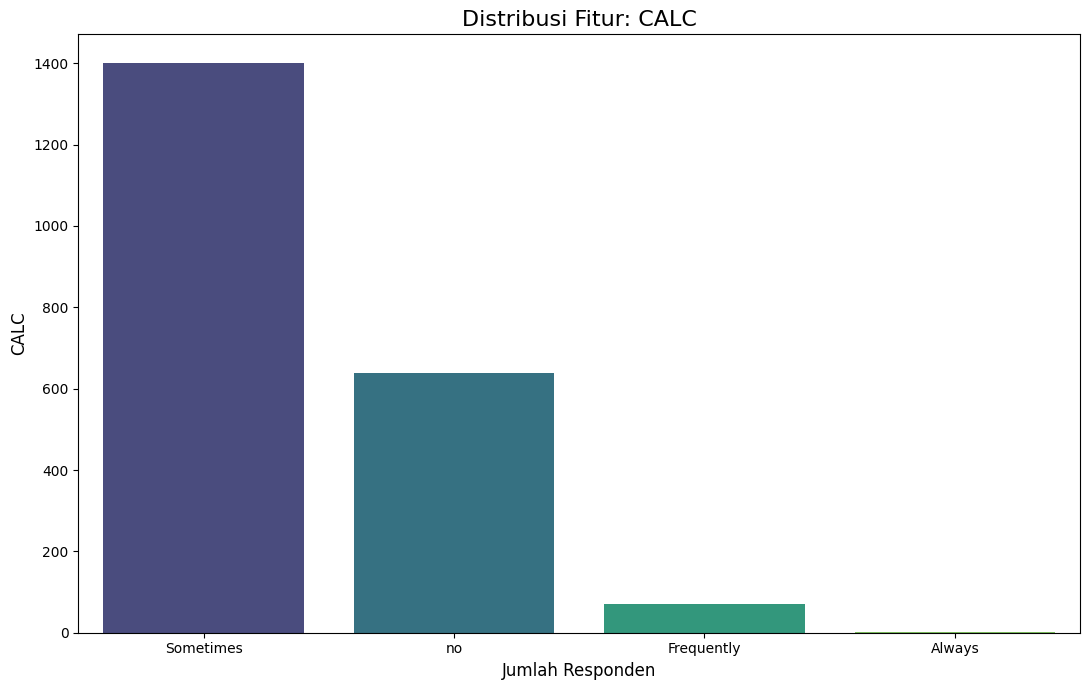

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12164\3667667619.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=df, palette='viridis', order=df[feature].value_counts().index)


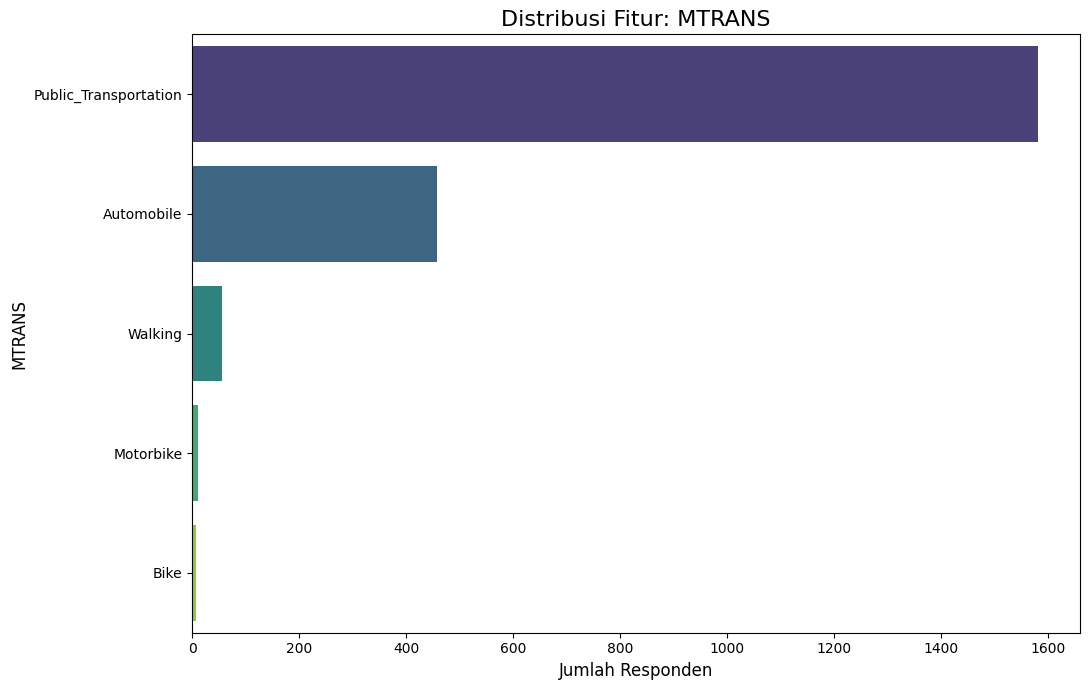

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12164\3667667619.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=df, palette='viridis', order=df[feature].value_counts().index)


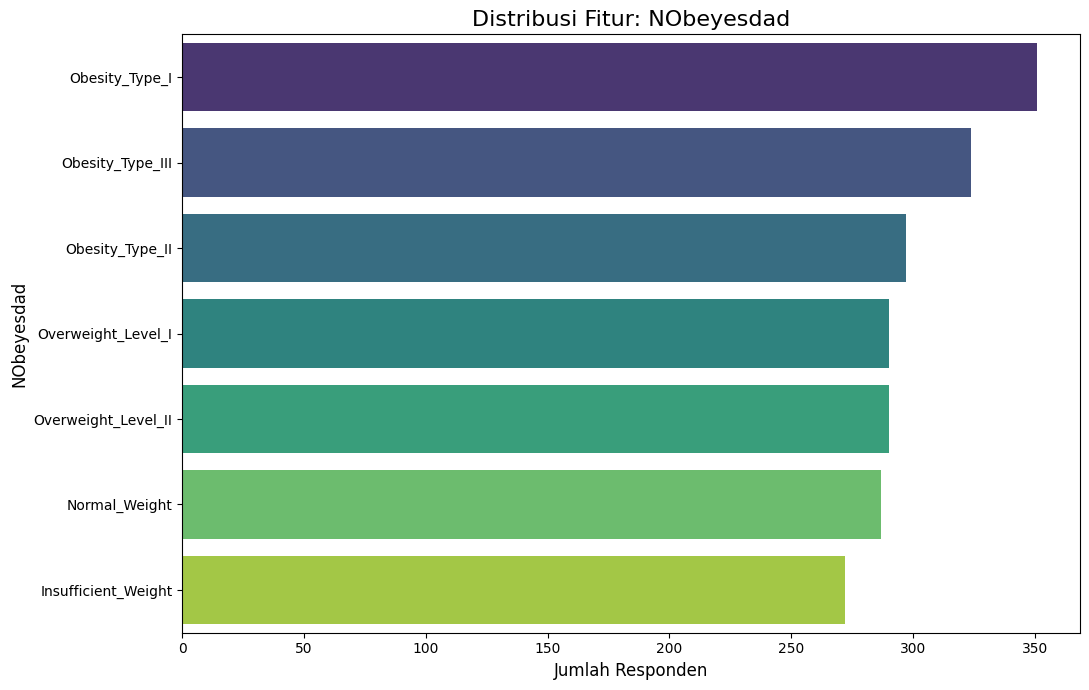

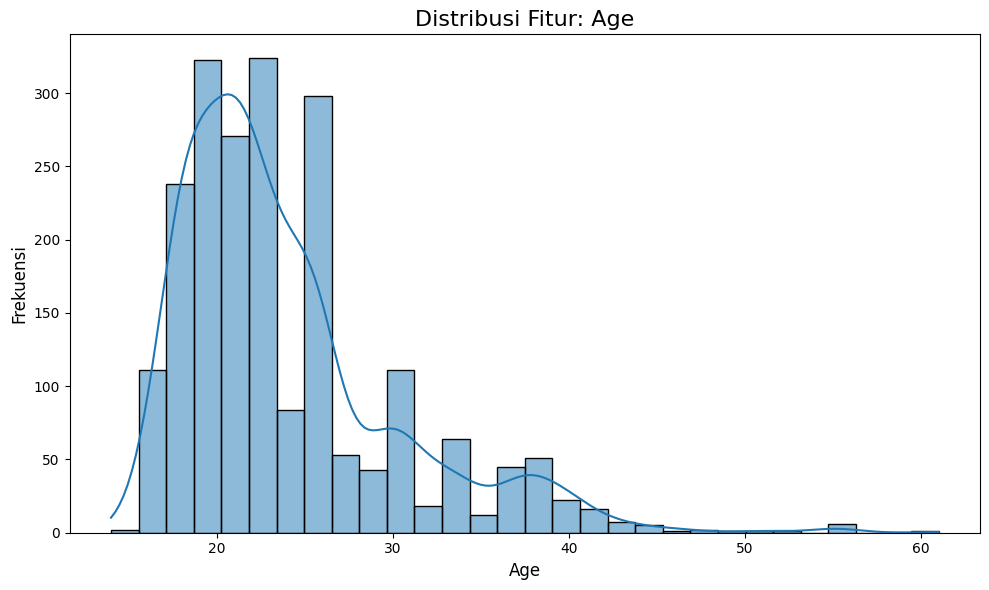

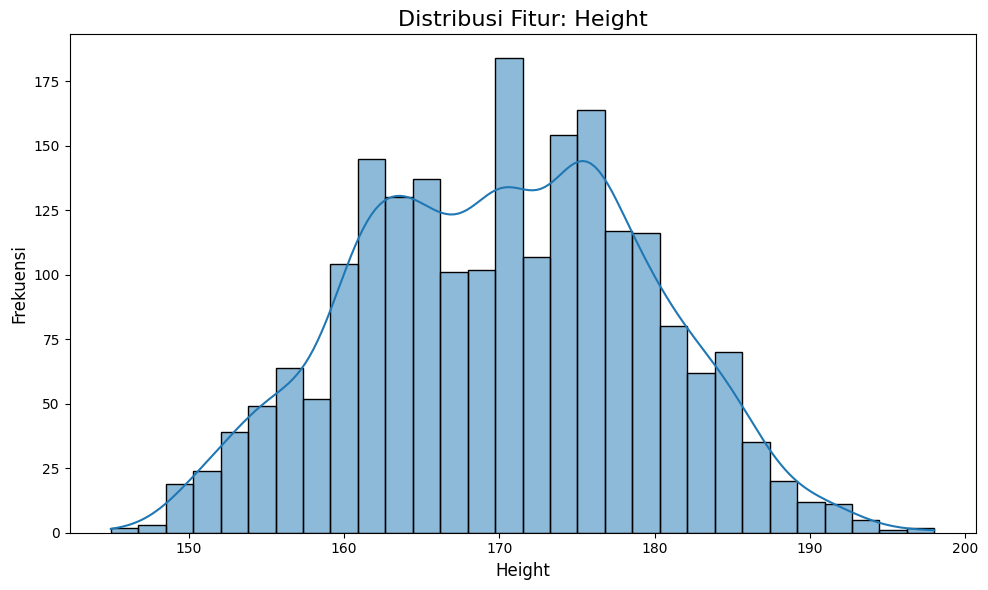

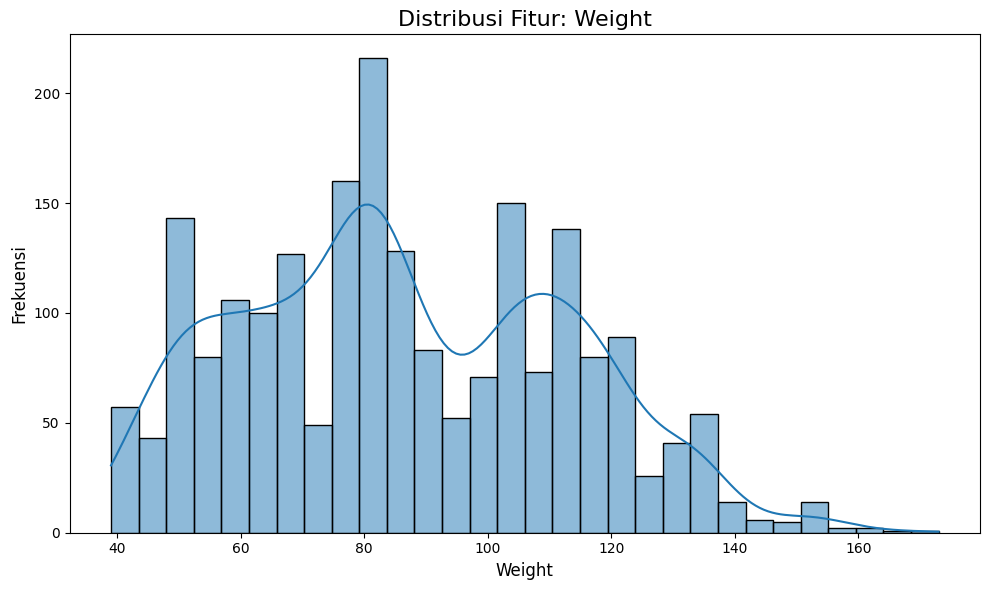

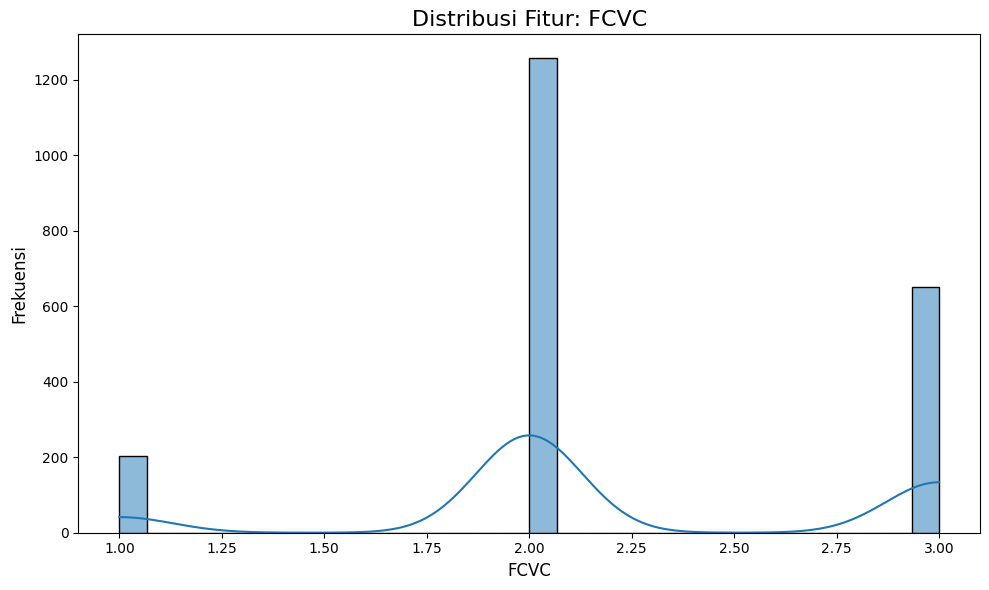

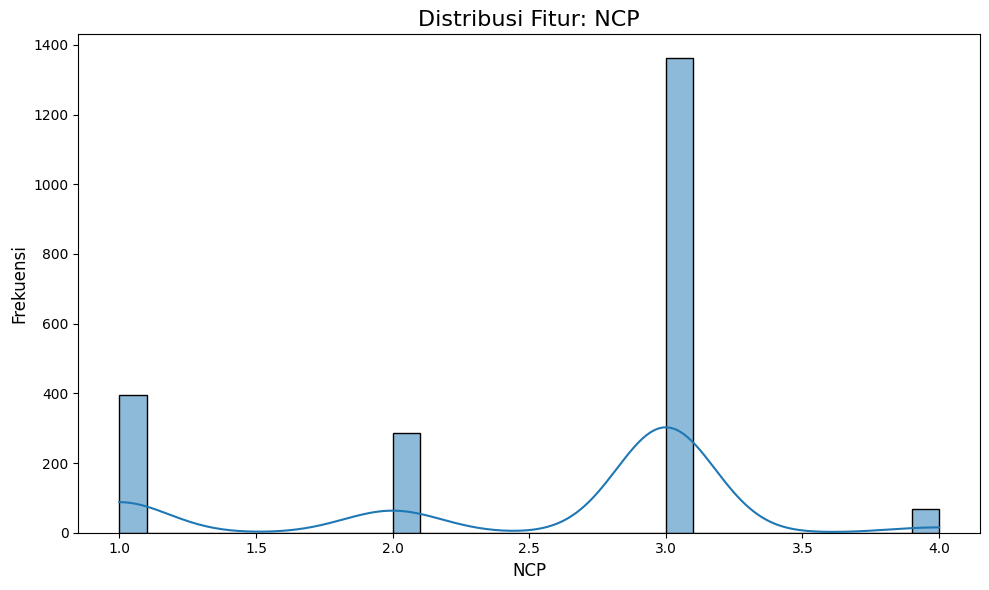

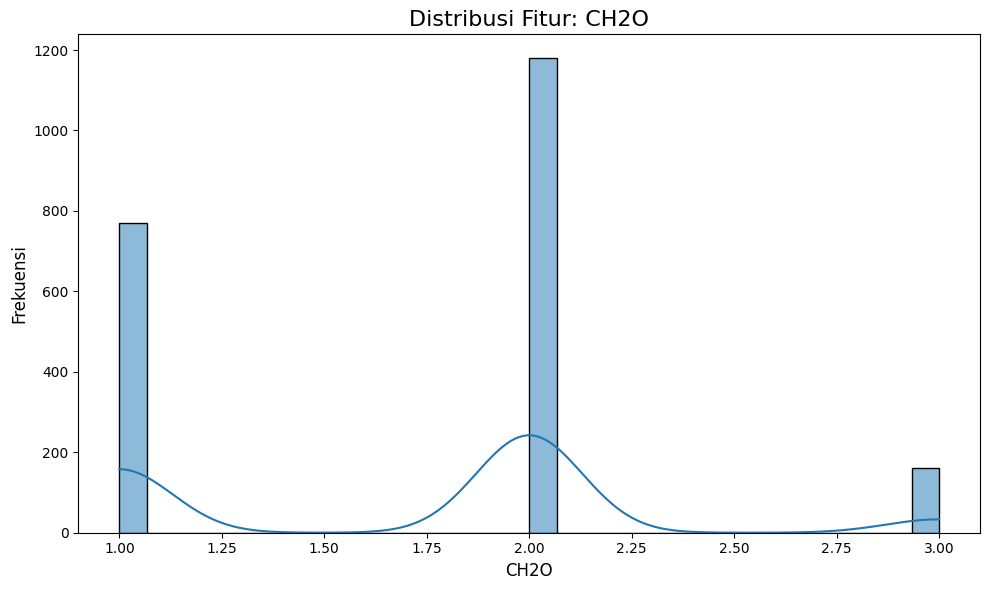

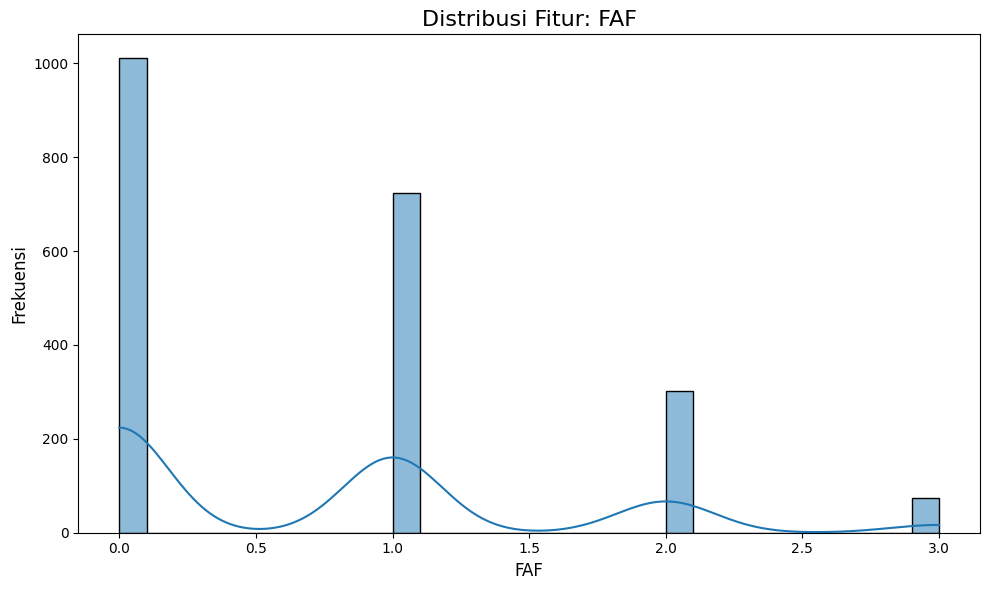

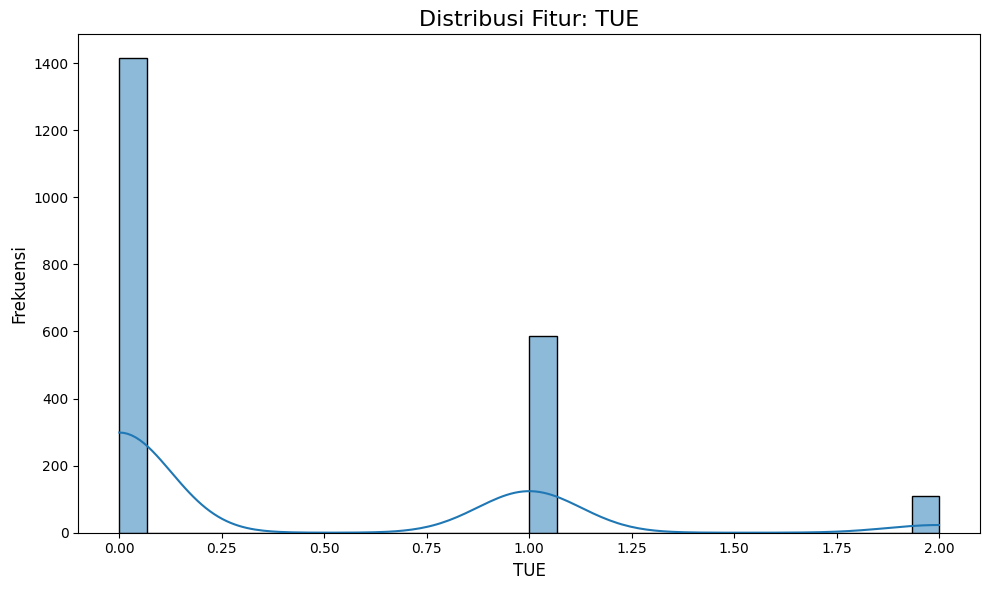

In [6]:
def tampilkan_visualisasi_semua_fitur():

    categorical_features = df.select_dtypes(include=['object']).columns
    numerical_features = df.select_dtypes(include=['number']).columns

    print("\nMemulai proses penampilan plot...")
    print("Tutup jendela plot yang muncul untuk melanjutkan ke plot berikutnya.")

    for feature in categorical_features:
        plt.figure(figsize=(11, 7))
        if df[feature].nunique() > 4:
            sns.countplot(y=feature, data=df, palette='viridis', order=df[feature].value_counts().index)
        else:
            sns.countplot(x=feature, data=df, palette='viridis', order=df[feature].value_counts().index)

        plt.title(f'Distribusi Fitur: {feature}', fontsize=16)
        plt.xlabel('Jumlah Responden', fontsize=12)
        plt.ylabel(feature, fontsize=12)
        plt.tight_layout()
        plt.show()

    for feature in numerical_features:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[feature], kde=True, bins=30) # kde menambahkan garis kurva distribusi
        plt.title(f'Distribusi Fitur: {feature}', fontsize=16)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Frekuensi', fontsize=12)
        plt.tight_layout()
        plt.show()

if __name__ == '__main__':
    tampilkan_visualisasi_semua_fitur()

### Heatmaps

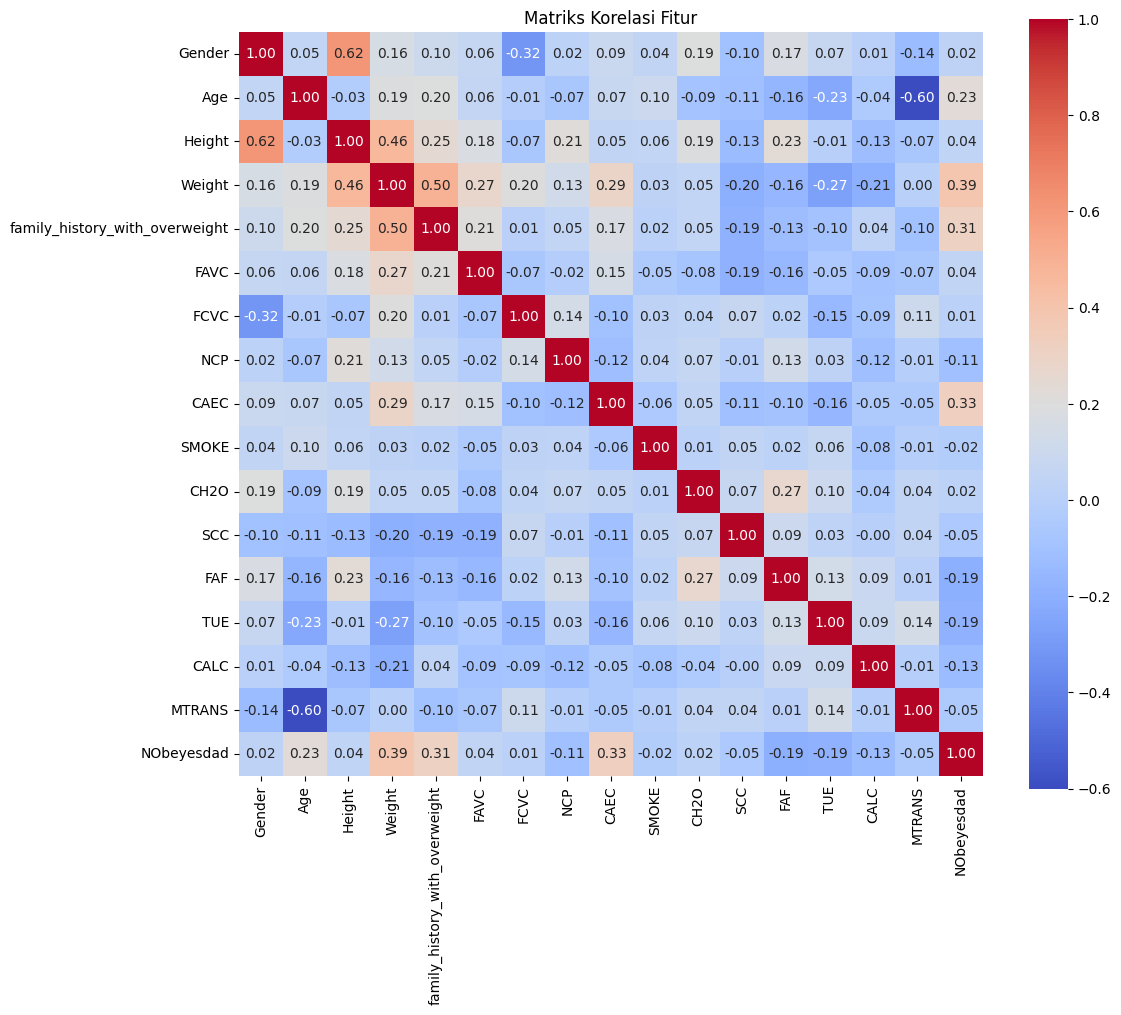

In [8]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for column in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriks Korelasi Fitur')
plt.show()

## Splitting the dataset into the Training set and Test set

In [9]:
# Use the original DataFrame X for train_test_split so column names are preserved
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=0, stratify=y)


In [10]:
# Cari Otomatis Hyperparameter Tuning pake GridSearchCV
CatBoost_Model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=8,
    cat_features=categorical_features,
    loss_function='MultiClass',
    random_seed=42,
    verbose=0
)

## Training the CatBoost Classification model on the Training set

In [12]:
CatBoost_Model.fit(X_train, y_train)
y_pred = CatBoost_Model.predict(X_test)
print("===== HASIL EVALUASI MODEL CatBoost =====")
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")
print("\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("============================================")

===== HASIL EVALUASI MODEL CatBoost =====
Akurasi Model: 96.22%


Confusion Matrix:
[[54  0  0  0  0  0  0]
 [ 1 51  0  0  0  6  0]
 [ 0  0 67  2  0  0  1]
 [ 0  0  0 60  0  0  0]
 [ 0  0  0  0 65  0  0]
 [ 0  2  0  0  0 56  0]
 [ 0  0  2  0  0  2 54]]


Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      1.00      0.99        54
      Normal_Weight       0.96      0.88      0.92        58
     Obesity_Type_I       0.97      0.96      0.96        70
    Obesity_Type_II       0.97      1.00      0.98        60
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       0.88      0.97      0.92        58
Overweight_Level_II       0.98      0.93      0.96        58

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423



In [ ]:
CatBoost_Model.save_model("catboost_obesity_model.cbm")

# Latihan

In [ ]:
CatBoost_Model2 = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=8,
    loss_function='MultiClass',
    random_seed=42,
    verbose=0
)

# Salin data fitur dan siapkan dictionary untuk menyimpan LabelEncoders
X_encoded = X_transformed.copy()
label_encoders = {}

# Ubah setiap kolom kategorikal menjadi angka dan simpan encodernya
for col in categorical_features:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_transformed[col])
    label_encoders[col] = le

# Bagi data yang sudah di-encode untuk melatih model LIME
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(
    X_encoded, y, test_size=0.2, random_state=0, stratify=y
)

# Latih CatBoost_Model2 pada data yang sudah sepenuhnya numerik
CatBoost_Model2.fit(X_train_encoded, y_train_encoded)

categorical_names = {}
for col in categorical_features:
    col_idx = X_transformed.columns.get_loc(col)
    categorical_names[col_idx] = label_encoders[col].classes_.tolist()
    
explainer = LimeTabularExplainer(
    training_data=X_train_encoded.values,
    feature_names=X_train_encoded.columns.tolist(),
    class_names=CatBoost_Model.classes_,
    categorical_features=[X_transformed.columns.get_loc(col) for col in categorical_features],
    categorical_names= categorical_names,
    mode='classification',
    random_state=42
)

print("Persiapan untuk LIME selesai. Model kedua telah dilatih pada data numerik.")

Persiapan untuk LIME selesai. Model kedua telah dilatih pada data numerik.


In [ ]:
def get_user_input():
    """Fungsi untuk mengambil input dari pengguna dengan validasi."""
    print("\nSilakan masukkan data untuk prediksi tingkat obesitas:")
    data = {}
    try:
        data['Gender'] = input("Jenis Kelamin (Male/Female): ").strip()
        data['Age'] = int(input("Umur: "))
        data['Height'] = int(input("Tinggi Badan (cm): "))
        data['Weight'] = int(input("Berat Badan (kg): "))
        data['family_history_with_overweight'] = input("Riwayat keluarga dengan berat badan berlebih? (yes/no): ").strip()
        data['FAVC'] = input("Sering makan makanan tinggi kalori? (yes/no): ").strip()
        data['FCVC'] = int(input("Frekuensi makan sayur (1: Tidak, 2: Kadang-kadang, 3: Selalu): "))
        data['NCP'] = int(input("Berapa kali makan utama per hari? (1-4): "))
        data['CAEC'] = input("Makan di antara waktu makan? (No/Sometimes/Frequently/Always): ").strip()
        data['SMOKE'] = input("Apakah Anda merokok? (yes/no): ").strip()
        data['CH2O'] = int(input("Berapa banyak air yang diminum setiap hari? (1: <1L, 2: 1-2L, 3: >2L): "))
        data['SCC'] = input("Memantau kalori yang Anda makan? (yes/no): ").strip()
        data['FAF'] = int(input("Aktivitas fisik (0: Tidak pernah, 1: 1-2 hari, 2: 2-3 hari, 3: >3 hari): "))
        data['TUE'] = int(input("Waktu penggunaan perangkat teknologi (0: <1 jam, 1: 1-2 jam, 2: >2 jam): "))
        data['CALC'] = input("Seberapa sering minum alkohol? (No/Sometimes/Frequently/Always): ").strip()
        data['MTRANS'] = input("Transportasi yang biasa digunakan (Automobile/Motorbike/Bike/Public_Transportation/Walking): ").strip().replace(" ", "_")
        
        return pd.DataFrame([data])
    except ValueError:
        print("❌ Input tidak valid. Mohon masukkan data yang benar.")
        return None

# Ambil input dari pengguna
data_pasien_baru = get_user_input()



Silakan masukkan data untuk prediksi tingkat obesitas:


In [ ]:
print(data_pasien_baru)

  Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0   Male   21     168      72                             no   no     3    3   

        CAEC SMOKE  CH2O SCC  FAF  TUE CALC     MTRANS  
0  Sometimes    no     3  no    1    2   no  Motorbike  


Hasil Prediksi: Berat Badan Normal
Keyakinan Model: 81.72%

🔍 Menganalisis Faktor Dominan dengan LIME...

✅ Faktor Pendukung Prediksi:
- 65.00 < Weight <= 82.59 (Bobot Pengaruh: 0.15)
- MTRANS=Motorbike (Bobot Pengaruh: 0.12)
- TUE > 1.00 (Bobot Pengaruh: 0.04)
- family_history_with_overweight=no (Bobot Pengaruh: 0.03)
- CALC=no (Bobot Pengaruh: 0.03)
- 2.00 < FCVC <= 3.00 (Bobot Pengaruh: 0.02)
- SCC=no (Bobot Pengaruh: 0.02)

❌ Faktor Bertentangan dengan Prediksi:
- CH2O > 2.00 (Bobot Pengaruh: 0.04)
- CAEC=Sometimes (Bobot Pengaruh: 0.03)
- SMOKE=no (Bobot Pengaruh: 0.03)

--- Visualisasi Faktor Pengaruh ---


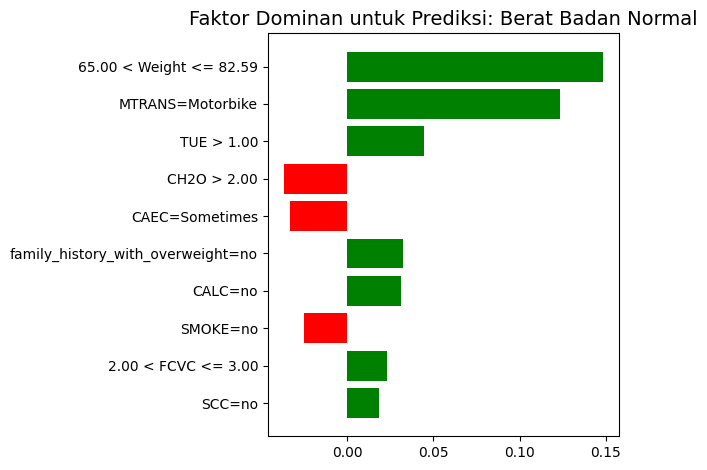

In [ ]:
hasil_prediksi_nama = CatBoost_Model.predict(data_pasien_baru)[0][0]
prediksi_proba = CatBoost_Model.predict_proba(data_pasien_baru)

deskripsi_hasil = {
    'Insufficient_Weight': 'Kekurangan Berat Badan', 'Normal_Weight': 'Berat Badan Normal',
    'Overweight_Level_I': 'Kelebihan Berat Badan Tingkat I', 'Overweight_Level_II': 'Kelebihan Berat Badan Tingkat II',
    'Obesity_Type_I': 'Obesitas Tingkat I', 'Obesity_Type_II': 'Obesitas Tingkat II', 'Obesity_Type_III': 'Obesitas Tingkat III'
}

print("=" * 50)
print(f"Hasil Prediksi: {deskripsi_hasil.get(hasil_prediksi_nama, 'Kategori tidak dikenal')}")

daftar_kelas = list(CatBoost_Model.classes_)
kelas_prediksi_index = daftar_kelas.index(hasil_prediksi_nama)
probabilitas_prediksi = prediksi_proba[0][kelas_prediksi_index]
print(f"Keyakinan Model: {probabilitas_prediksi:.2%}")
print("=" * 50)

# 2. Siapkan Data untuk LIME (Encode Input Pasien)
pasien_encoded_df = data_pasien_baru.copy()
for col, encoder in label_encoders.items():
    pasien_encoded_df[col] = encoder.transform(pasien_encoded_df[col])

# 3. Hasilkan Penjelasan LIME
print("\n🔍 Menganalisis Faktor Dominan dengan LIME...")
explanation = explainer.explain_instance(
    pasien_encoded_df.iloc[0].values,
    CatBoost_Model2.predict_proba,
    num_features=10, top_labels=1
)

# 4. Tampilkan Hasil Penjelasan (Sudah bisa dibaca, tidak perlu decode manual)
top_label_index = explanation.top_labels[0]
hasil_lime = explanation.as_list(label=top_label_index)

print("\n✅ Faktor Pendukung Prediksi:")
for feature, weight in hasil_lime:
    if weight > 0:
        print(f"- {feature} (Bobot Pengaruh: {weight:.2f})")

print("\n❌ Faktor Bertentangan dengan Prediksi:")
for feature, weight in hasil_lime:
    if weight < 0:
        print(f"- {feature} (Bobot Pengaruh: {abs(weight):.2f})")
        
# 5. Tampilkan Plot LIME
print("\n--- Visualisasi Faktor Pengaruh ---")
fig = explanation.as_pyplot_figure(label=top_label_index)
plt.title(f'Faktor Dominan untuk Prediksi: {deskripsi_hasil.get(hasil_prediksi_nama)}', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
explanation.show_in_notebook(show_table=True)

In [ ]:
import numpy as np

# Pastikan data_pasien_baru sudah ada dari input pengguna
if 'data_pasien_baru' in locals() and data_pasien_baru is not None:
    # Tentukan fitur kontinu dan nama kolom target
    continuous_features = df.select_dtypes(include=['number']).columns.tolist()
    target_name = 'NObeyesdad'
    
    if target_name in continuous_features:
        continuous_features.remove(target_name)

    # 1. Inisialisasi objek Data untuk DiCE
    d = dice_ml.Data(dataframe=df,
                     continuous_features=continuous_features,
                     outcome_name=target_name)

    # 2. Inisialisasi objek Model untuk DiCE
    m = dice_ml.Model(model=CatBoost_Model, backend="sklearn")

    # 3. Buat explainer DiCE
    exp = dice_ml.Dice(d, m, method="random")

    # 4. Ambil data pasien yang akan dijelaskan
    query_instance = data_pasien_baru[X_train.columns]

    # 5. Hasilkan counterfactuals
    # PERBAIKAN: Cari kelas target secara dinamis berdasarkan namanya untuk mendapatkan indeksnya
    desired_class_name = "Normal_Weight"
    try:
        # Dapatkan daftar kelas dari model yang sudah dilatih
        class_names = m.model.classes_.tolist()
        # Cari indeks dari kelas yang kita inginkan
        desired_class_index = class_names.index(desired_class_name)
        
        print(f"INFO: Mencari counterfactuals untuk kelas target: '{desired_class_name}' (ditemukan pada indeks: {desired_class_index})")

        dice_exp = exp.generate_counterfactuals(query_instance,
                                                total_CFs=6,
                                                desired_class=desired_class_index) # Gunakan indeks, bukan string

        # 6. Tampilkan hasilnya
        print("\\n==================================================")
        print("Analisis Counterfactual (Apa yang harus diubah?)")
        print("==================================================\\n")
        dice_exp.visualize_as_dataframe(show_only_changes=True)

    except ValueError:
        print(f"❌ KESALAHAN: Kelas target '{desired_class_name}' tidak ditemukan dalam daftar kelas model.")
        if 'm' in locals() and hasattr(m.model, 'classes_'):
             print(f"Daftar kelas yang tersedia adalah: {m.model.classes_.tolist()}")
        print("Mohon periksa kembali nama kelas yang diinginkan (kapitalisasi, spasi, dll).")

else:
    print("❌ Silakan jalankan sel untuk memasukkan data pasien baru terlebih dahulu.")


INFO: Mencari counterfactuals untuk kelas target: 'Normal_Weight' (ditemukan pada indeks: 1)


100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

\n==================================================
Analisis Counterfactual (Apa yang harus diubah?)
==================================================\n
Query instance (original outcome : Normal_Weight)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,21,168,72,no,no,3,3,Sometimes,no,3,no,1,2,no,Motorbike,Normal_Weight



Diverse Counterfactual set (new outcome: Normal_Weight)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-,-,-,-,-,-,2,-,-,-,-,-,-,-,-,Walking,-
1,-,-,-,-,-,-,-,-,-,-,2,-,-,-,Sometimes,-,-
2,-,-,-,-,-,-,-,-,-,-,-,yes,-,-,-,-,-
3,-,-,-,-,-,-,-,-,-,-,-,-,2,-,-,Public_Transportation,-
4,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,Automobile,-
5,-,-,171,-,-,-,-,-,-,-,-,-,-,-,Sometimes,-,-


# Dataset

In [ ]:
# Dataset Stroke
# https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data

# Dataset Obesitas Level
# https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition